## Calorie Intake Predictor

### Life cycle of Machine Learning Project

- Understanding the Problem Statement
- Data Collection
- Data Checks to perform
- Exploratory data analysis
- Data Pre-Processing
- Model Training
- Choose best model

### 1) Problem statement

- This project understands how the Calorie intake (Reauired daily calories) is affected by other variable such as Age, Gender, Height(in m), Working Type, Sleep hours

### 2) Data Collection

- Dataset Source - 
[Balance diet dataset] (https://www.kaggle.com/datasets/algovai/balance-diet-dataset)

### 2.1 Import Data and required packages

#### Importing Pandas, Numpy, Matplotlib, Seaborn and Warnings library

In [204]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [205]:
df = pd.read_csv(r"C:\Users\ysanc\OneDrive\Desktop\Callorie_Intake_calculator\data\balanc_diet.csv")

In [206]:
df.head()

,ID,Age,Gender,Working_Type,Sleep_Hours,Height_m,Required_Daily_Calories
0,5398,68.0,Female,Unemployed,6.627585,1.861374,1898.520157
1,3078,19.0,Female,Desk Job,5.671469,1.732762,2439.173224
2,6051,50.0,Female,Freelancer,7.060029,1.509387,1746.165518
3,6503,54.0,Male,Healthcare,4.154597,1.832796,2461.167138
4,3602,27.0,Female,Desk Job,3.847020,1.624670,2105.472452


In [207]:
df.tail()

,ID,Age,Gender,Working_Type,Sleep_Hours,Height_m,Required_Daily_Calories
10195,3100,35.0,Female,Desk Job,8.164440,1.475782,2360.129593
10196,6185,40.0,Male,Desk Job,8.251327,1.969487,2523.668562
10197,3562,37.0,Male,Freelancer,7.691461,1.603877,2859.715104
10198,5893,60.0,Female,Student,6.960608,1.552269,2455.459190
10199,392,44.0,Male,Desk Job,8.100000,1.850000,2249.000000


In [208]:
df.shape

(10200, 7)

#### 2.2 Dataset information
- Age: age of the person
- Gender: sex of the person (Male/Female)
- Working type: Work type of the person (Desk Job, Freelancer, Student etc.)
- Sleep Hours: How many hours person sleep ?
- Height: Height of the person in meter

#### 3. Data Checks to perform
- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column

In [209]:
# Drop Unnecessary columns
df = df.drop('ID', axis = 1)

In [210]:
# Checking Missing values
df.isnull().sum()

Age                        29
Gender                      0
Working_Type               29
Sleep_Hours                29
Height_m                   29
Required_Daily_Calories    29
dtype: int64

In [211]:
df['Age'] = df.groupby('Gender')['Age'].transform(lambda x: x.fillna(x.median()))
df['Sleep_Hours'] = df['Sleep_Hours'].interpolate()
df['Working_Type'] = df['Working_Type'].fillna(df['Working_Type'].mode()[0])
df['Height_m'] = df['Height_m'].fillna(df['Height_m'].median())
df['Required_Daily_Calories'] = df['Required_Daily_Calories'].fillna(df['Required_Daily_Calories'].median())

In [212]:
# Again checking the missing values
df.isnull().sum()

Age                        0
Gender                     0
Working_Type               0
Sleep_Hours                0
Height_m                   0
Required_Daily_Calories    0
dtype: int64

In [213]:
df.duplicated().sum()

np.int64(100)

In [214]:
# Checking the Data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10200 entries, 0 to 10199
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      10200 non-null  float64
 1   Gender                   10200 non-null  object 
 2   Working_Type             10200 non-null  object 
 3   Sleep_Hours              10200 non-null  float64
 4   Height_m                 10200 non-null  float64
 5   Required_Daily_Calories  10200 non-null  float64
dtypes: float64(4), object(2)
memory usage: 478.3+ KB


In [215]:
# Cheking the number of unique values of each column
df.nunique()

Age                          65
Gender                        2
Working_Type                  8
Sleep_Hours                7788
Height_m                   7975
Required_Daily_Calories    9163
dtype: int64

In [216]:
# Checking Stastics of the data
df.describe()

,Age,Sleep_Hours,Height_m,Required_Daily_Calories
count,10200.000000,10200.000000,10200.000000,10200.000000
mean,43.838529,6.937551,1.726857,2306.111637
std,15.507062,1.764845,0.113791,435.462524
min,10.000000,3.000000,1.300000,977.000000
25%,31.000000,5.455732,1.650210,2005.572557
50%,44.000000,6.946496,1.728573,2269.182960
75%,57.000000,8.422119,1.800929,2558.912247
max,74.000000,10.000000,2.095437,4000.000000


#### Minumum Required Daily calories is 977 and maximum is 4000 

In [217]:
df.head()

,Age,Gender,Working_Type,Sleep_Hours,Height_m,Required_Daily_Calories
0,68.0,Female,Unemployed,6.627585,1.861374,1898.520157
1,19.0,Female,Desk Job,5.671469,1.732762,2439.173224
2,50.0,Female,Freelancer,7.060029,1.509387,1746.165518
3,54.0,Male,Healthcare,4.154597,1.832796,2461.167138
4,27.0,Female,Desk Job,3.847020,1.624670,2105.472452


In [218]:
print("Categories in 'Gender' variable:     ",end=" " )
print(df['Gender'].unique())

print("Categories in 'Working_Type':  ",end=" ")
print(df['Working_Type'].unique())

Categories in 'Gender' variable:      ['Female' 'Male']
Categories in 'Working_Type':   ['Unemployed' 'Desk Job' 'Freelancer' 'Healthcare' 'Retired'
 'Manual Labor' 'Student' 'Self-Employed']


In [219]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 4 numerical features : ['Age', 'Sleep_Hours', 'Height_m', 'Required_Daily_Calories']

We have 2 categorical features : ['Gender', 'Working_Type']


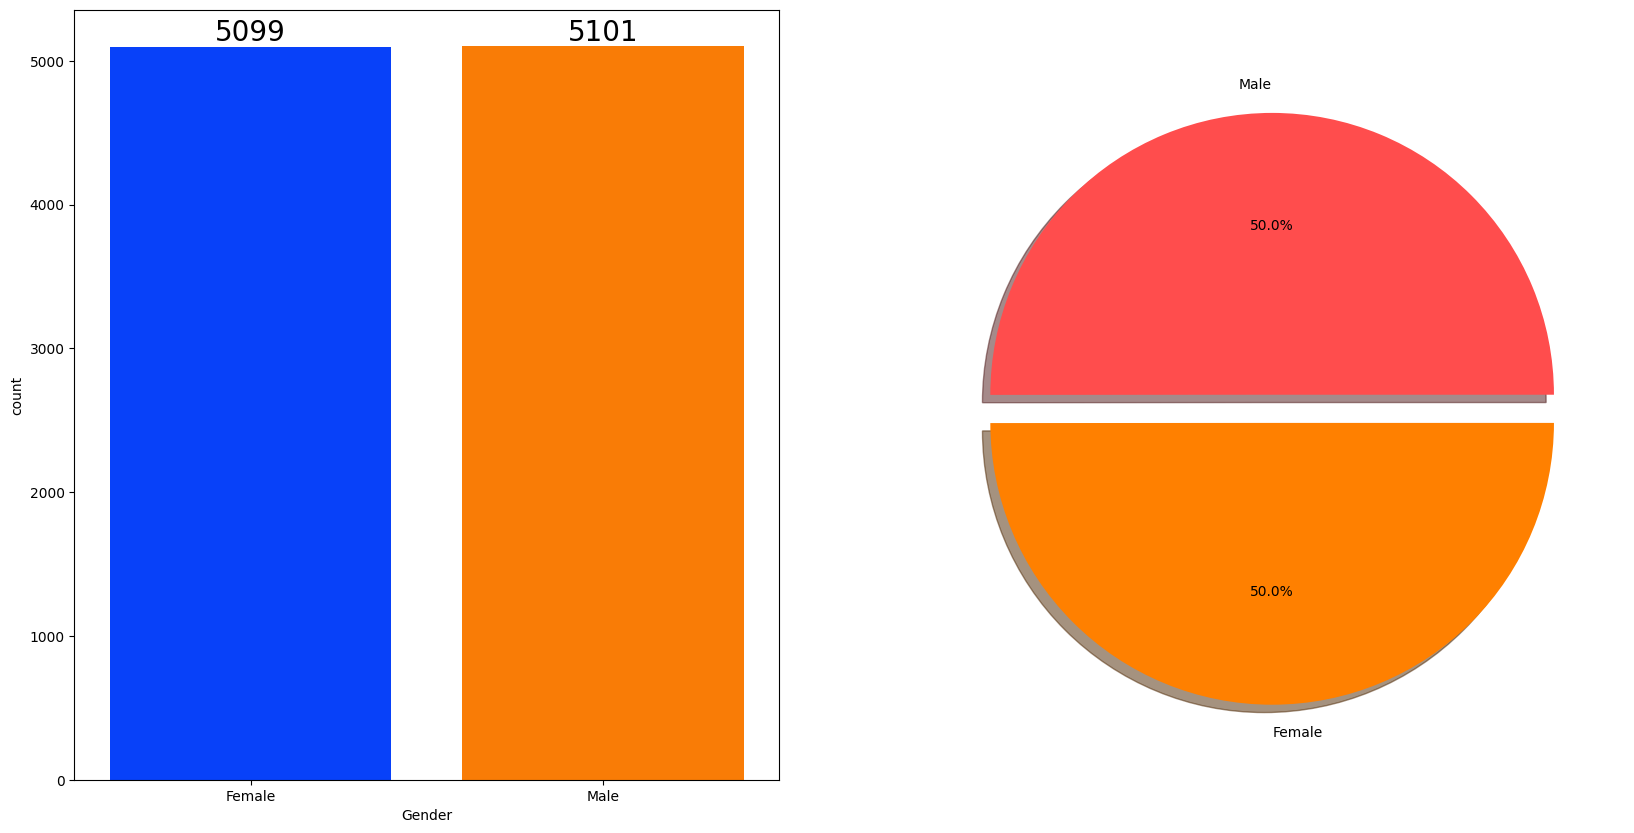

In [220]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['Gender'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=df['Gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

#### Insights:
- Gender has balanced data with Male persons are 5099 (50%) and Female persons are 5101 (50%)

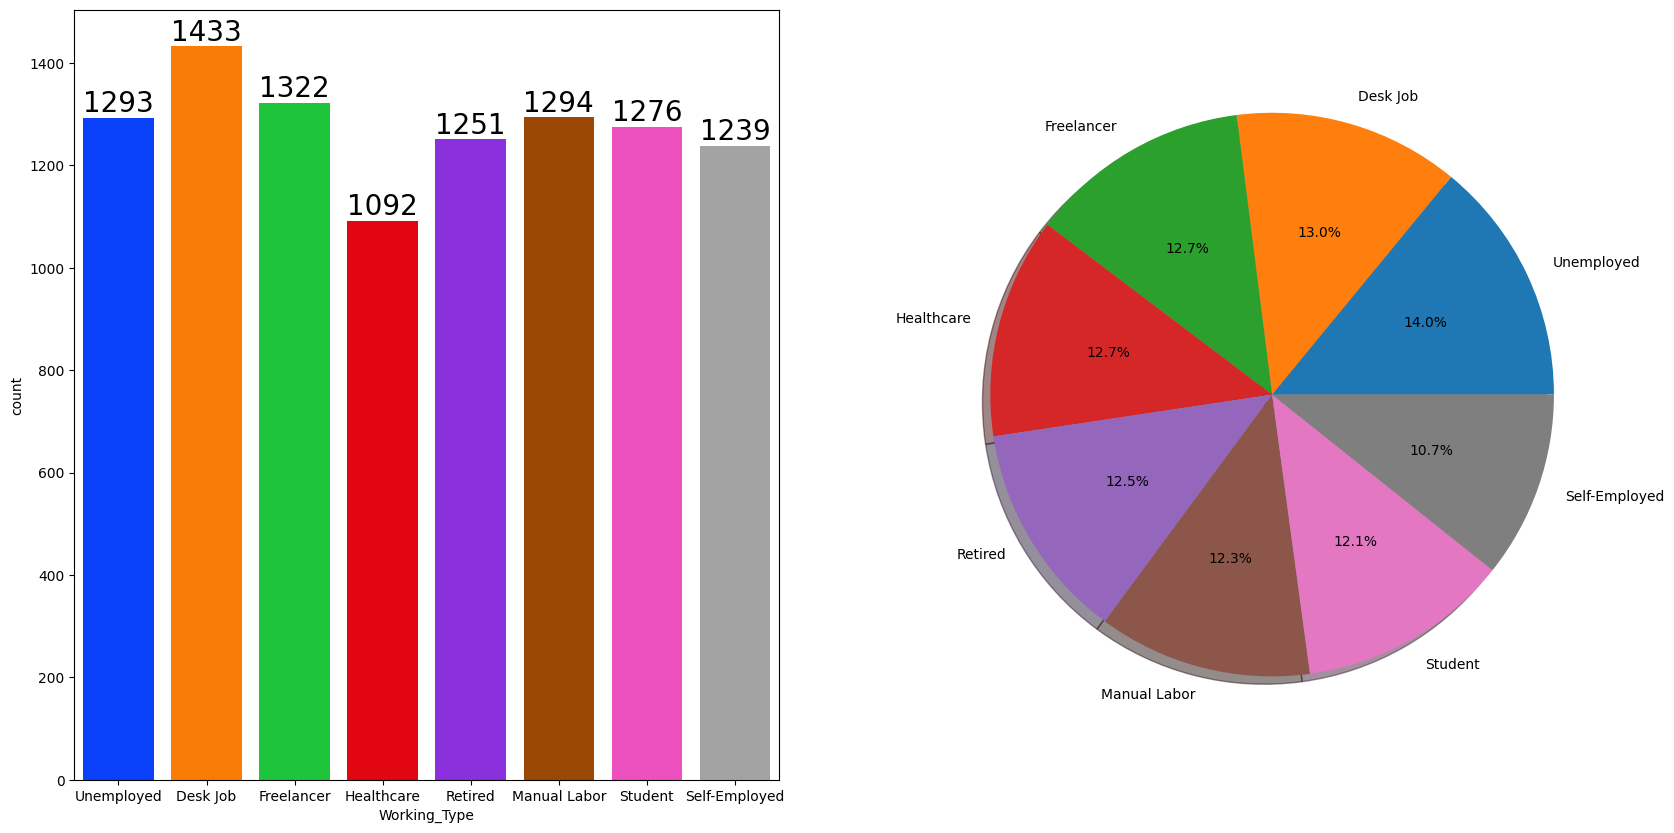

In [221]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['Working_Type'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=df['Working_Type'].value_counts(),labels=['Unemployed','Desk Job','Freelancer','Healthcare','Retired','Manual Labor','Student','Self-Employed'],autopct='%1.1f%%',shadow=True)
plt.show()

#### Insights:
- Maximum persons are unemployed and then desk job

In [222]:
df.columns

Index(['Age', 'Gender', 'Working_Type', 'Sleep_Hours', 'Height_m',
       'Required_Daily_Calories'],
      dtype='object')

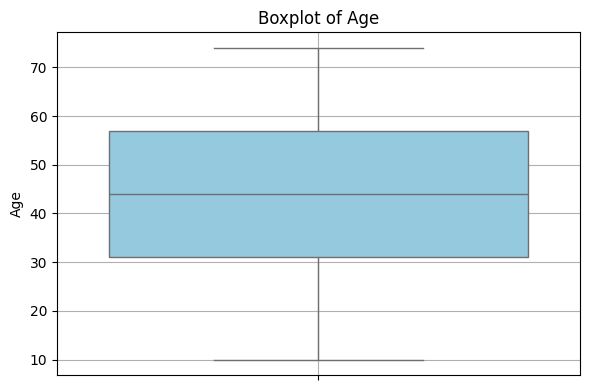

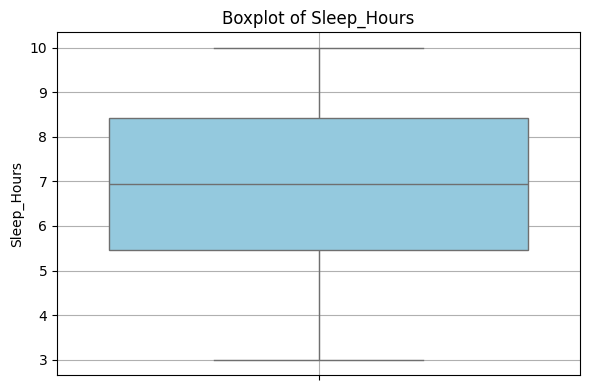

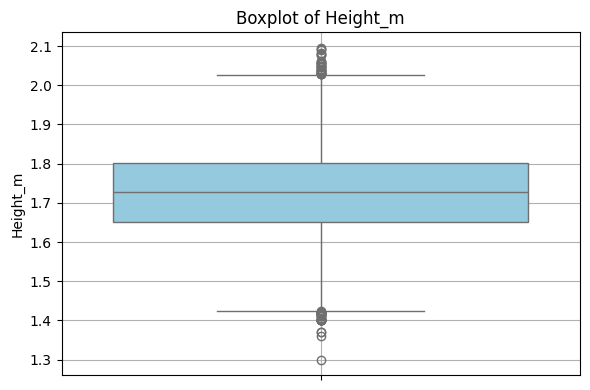

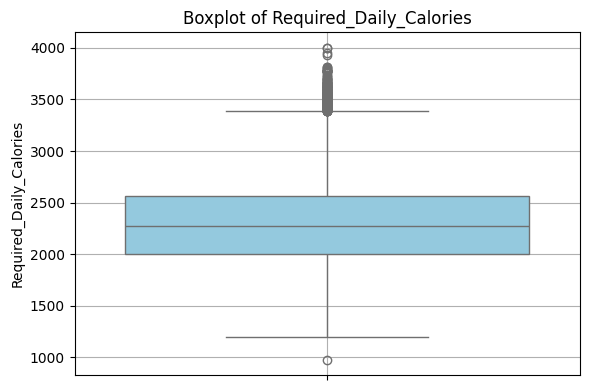

In [223]:
num_columns = ['Age', 'Sleep_Hours', 'Height_m', 'Required_Daily_Calories']
for col in num_columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(y=df[col], color='skyblue')
    plt.title(f'Boxplot of {col}')
    plt.ylabel(col)
    plt.grid(True)
    plt.tight_layout()
    plt.show()


#### Insights:

- There is no outliers in columns [Age, Sleep Hours]
- Outliers detected in columns [Height_m, Required Daily Calorie]

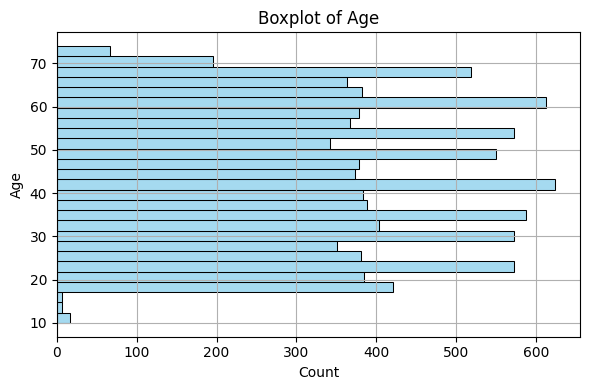

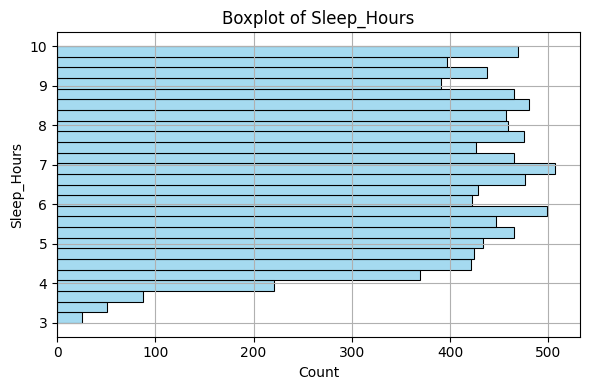

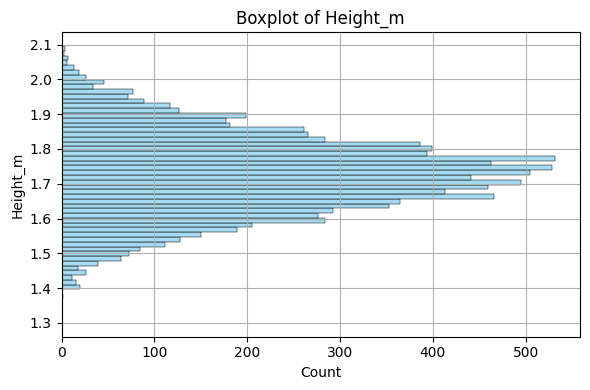

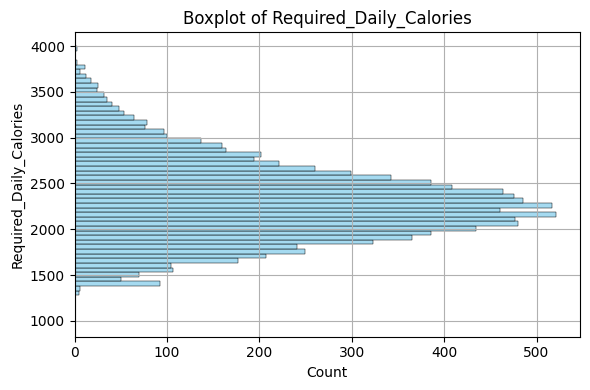

In [224]:
for col in num_columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(y=df[col], color='skyblue')
    plt.title(f'Boxplot of {col}')
    plt.ylabel(col)
    plt.grid(True)
    plt.tight_layout()
    plt.show()